# Exercises I

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from env import user, host, password
import explore
import acquire

import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_telco_data()
df

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                   1                         1                 2  2794-XIMMO   
1                   1                         1                 2  2851-STERV   
2                   1                         1                 2  2898-LSJGD   
3                   1                         1                 2  2969-WGHQO   
4                   1                         1                 2  2988-PLAHS   
...               ...                       ...               ...         ...   
7038                3                         3                 3  9178-JHUVJ   
7039                3                         3                 3  9257-AZMTZ   
7040                3                         3                 3  9537-JALFH   
7041                3                         3                 3  9574-BOSMD   
7042                3                         3                 3  9764-REAFF   

      gender  senior_citizen partner dependents  tenure phone_service  ...  \
0       Male               0     Yes         No      53            No  ...   
1       Male               1      No         No      35           Yes  ...   
2     Female               0     Yes        Yes      21            No  ...   
3     Female               0     Yes        Yes       7           Yes  ...   
4     Female               0      No         No       3           Yes  ...   
...      ...             ...     ...        ...     ...           ...  ...   
7038    Male               0     Yes        Yes      24           Yes  ...   
7039  Female               0     Yes        Yes      52           Yes  ...   
7040    Male               0     Yes        Yes      69           Yes  ...   
7041    Male               0     Yes        Yes      68           Yes  ...   
7042  Female               0     Yes         No      59           Yes  ...   

             tech_support         streaming_tv     streaming_movies  \
0                     Yes                  Yes                  Yes   
1                     Yes                  Yes                  Yes   
2                      No                  Yes                  Yes   
3                      No                  Yes                   No   
4                      No                  Yes                  Yes   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039  No internet service  No internet service  No internet service   
7040  No internet service  No internet service  No internet service   
7041  No internet service  No internet service  No internet service   
7042  No internet service  No internet service  No internet service   

     paperless_billing monthly_charges total_charges churn contract_type  \
0                  Yes           60.45       3184.25   Yes      One year   
1                  Yes           73.00       2471.25    No      One year   
2                  Yes           55.95       1157.05   Yes      One year   
3                   No           69.45        477.05    No      One year   
4                  Yes           69.95        220.45    No      One year   
...                ...             ...           ...   ...           ...   
7038               Yes           24.10         587.4    No      Two year   
7039                No           20.10       1078.75    No      Two year   
7040                No           19.90        1356.7    No      Two year   
7041                No           25.40        1620.2    No      Two year   
7042                No           18.40       1057.85    No      Two year   

      internet_service_type               payment_type  
0                       DSL           Electronic check  
1                       DSL           Electronic check  
2                       DSL           Electronic check  
3                       DSL           Electronic check  
4                       DSL           Electro

In [3]:
def clean_telco(df):
    df.total_charges.replace(to_replace = {" ":"0"}, inplace = True) #Replaces 'blanks' with 0 inside total_charges
    df.total_charges = df.total_charges.astype("float") # Changes total_charges to float type

    pd.set_option("display.max_columns", None) # Allows notebook to display all columns in output

    df["auto_pay"] = df.payment_type.str.contains("auto") # Looks for 'auto' string in payment_type
    df["auto_pay"] = df.auto_pay.replace(to_replace = [True,False],value = [1,0]) # Replaces True with 1 and False with 0

    dummy_df = pd.get_dummies(df[['gender',"internet_service_type","contract_type"]]) # Creates dummies
    dummy_df.drop(columns=['gender_Female'], inplace=True) # Drops gender_Female column
    df = pd.concat([df, dummy_df], axis=1) # Combines dataframes horizontally
    # Encoding (Replaced Yes and No for 1 and 0)
    df["partner"] = df.partner.replace(to_replace = ["Yes","No"],value = [1,0])
    df["dependents"] = df.dependents.replace(to_replace = ["Yes","No"],value = [1,0])
    df["phone_service"] = df.phone_service.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["multiple_lines"] = df.multiple_lines.replace(to_replace = ["Yes","No","No phone service"],value = [1,0,0])
    df["online_security"] = df.online_security.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["online_backup"] = df.online_backup.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["device_protection"] = df.device_protection.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["tech_support"] = df.tech_support.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["streaming_tv"] = df.streaming_tv.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["streaming_movies"] = df.streaming_movies.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["paperless_billing"] = df.paperless_billing.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["churn"] = df.churn.replace(to_replace = ["Yes","No"],value = [1,0])
    # Created new column called "add_ons" which states whether extra features are present
    df["add_ons"] =  ((df.online_security + df.online_backup + df.device_protection + df.tech_support + df.streaming_tv + df.streaming_movies) > 0) 
    df["add_ons"] = df.add_ons.replace(to_replace = [True, False],value = [1,0])
    # Dropped columns I deemed unnecessary
    df = df.drop(columns= ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id', 'gender', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'])
    return df



In [4]:
df = clean_telco(df)
df

senior_citizen  partner  dependents  tenure  phone_service  \
0                  0        1           0      53              0   
1                  1        0           0      35              1   
2                  0        1           1      21              0   
3                  0        1           1       7              1   
4                  0        0           0       3              1   
...              ...      ...         ...     ...            ...   
7038               0        1           1      24              1   
7039               0        1           1      52              1   
7040               0        1           1      69              1   
7041               0        1           1      68              1   
7042               0        1           0      59              1   

      multiple_lines  paperless_billing  monthly_charges  total_charges  \
0                  0                  1            60.45        3184.25   
1                  0                  1            73.00        2471.25   
2                  0                  1            55.95        1157.05   
3                  0                  0            69.45         477.05   
4                  0                  1            69.95         220.45   
...              ...                ...              ...            ...   
7038               1                  1            24.10         587.40   
7039               0                  0            20.10        1078.75   
7040               0                  0            19.90        1356.70   
7041               1                  0            25.40        1620.20   
7042               0                  0            18.40        1057.85   

      churn  auto_pay  gender_Male  internet_service_type_DSL  \
0         1         0            1                          1   
1         0         0            1                          1   
2         1         0            0                          1   
3         0         0            0                          1   
4         0         0            0                          1   
...     ...       ...          ...                        ...   
7038      0         1            1                          0   
7039      0         1            0                          0   
7040      0         1            1                          0   
7041      0         1            1                          0   
7042      0         1            0                          0   

      internet_service_type_Fiber optic  internet_service_type_None  \
0                                     0                           0   
1                                     0                           0   
2                                     0                           0   
3                                     0                           0   
4                                     0                           0   
...                                 ...                         ...   
7038                                  0                           1   
7039                                  0                           1   
7040                                  0                           1   
7041                                  0                           1   
7042                                  0                           1   

      contract_type_Month-to-month  contract_type_One year  \
0                                0                       1   
1                                0                       1   
2                                0                       1   
3                                0                       1   
4                                0                       1   
...                            ...                     ...   
7038                             0                       0   
7039                             0                       0   
7040                             0                       0   
7041                             0

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

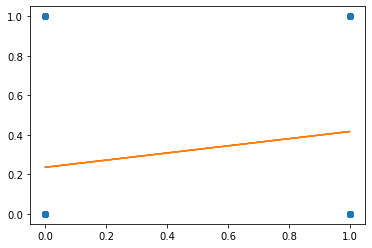

In [5]:
x = df.senior_citizen

y = df.churn
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
    

In [6]:
def plot_variable_pairs(df):
    for col in df.columns:
        print(f'{col}(x) vs churn(y)')
        x = df[col]
        y = df.churn
        plt.plot(x, y, 'o')
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b)
        plt.show()
        print('__________________')
    return print('done')

senior_citizen(x) vs churn(y)


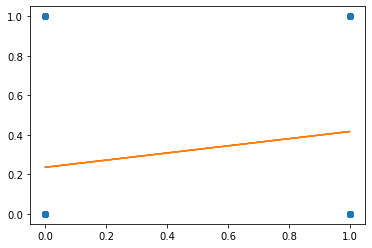

__________________
partner(x) vs churn(y)


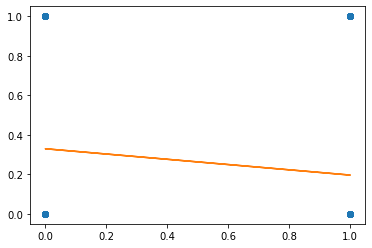

__________________
dependents(x) vs churn(y)


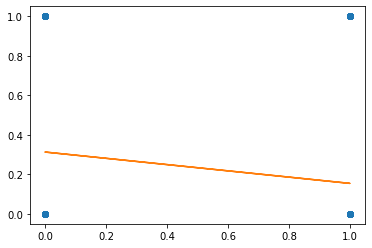

__________________
tenure(x) vs churn(y)


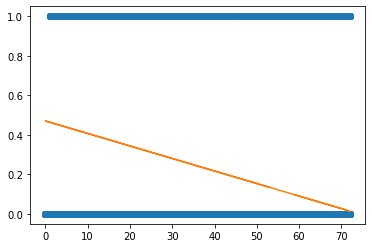

__________________
phone_service(x) vs churn(y)


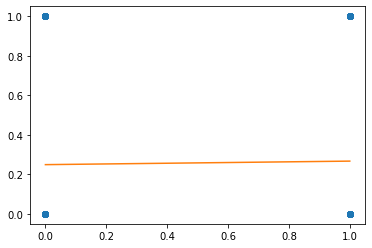

__________________
multiple_lines(x) vs churn(y)


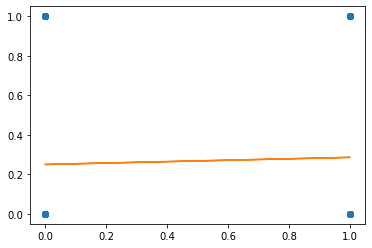

__________________
paperless_billing(x) vs churn(y)


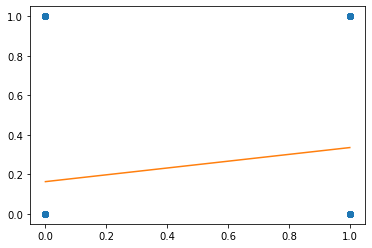

__________________
monthly_charges(x) vs churn(y)


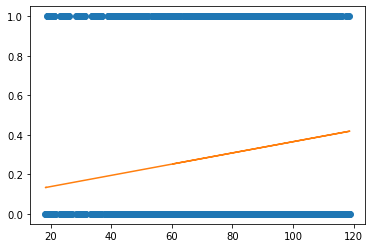

__________________
total_charges(x) vs churn(y)


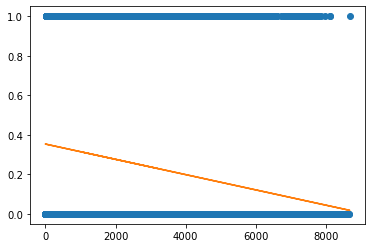

__________________
churn(x) vs churn(y)


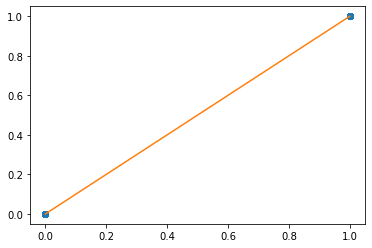

__________________
auto_pay(x) vs churn(y)


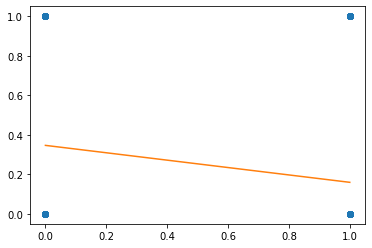

__________________
gender_Male(x) vs churn(y)


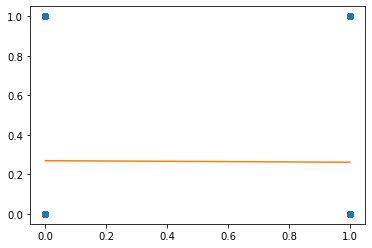

__________________
internet_service_type_DSL(x) vs churn(y)


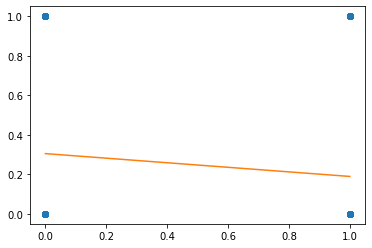

__________________
internet_service_type_Fiber optic(x) vs churn(y)


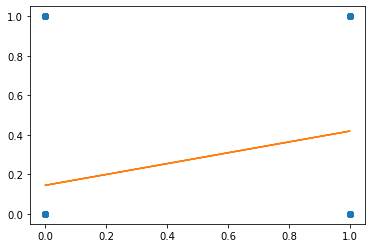

__________________
internet_service_type_None(x) vs churn(y)


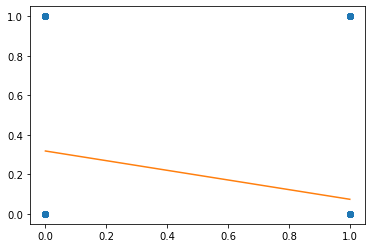

__________________
contract_type_Month-to-month(x) vs churn(y)


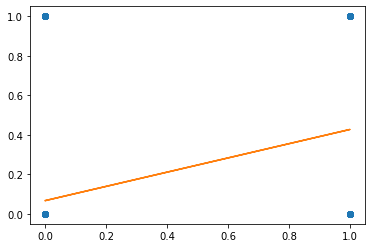

__________________
contract_type_One year(x) vs churn(y)


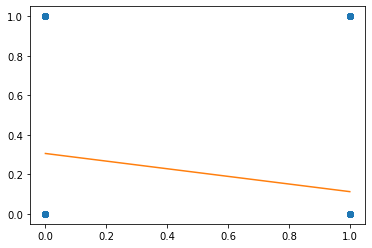

__________________
contract_type_Two year(x) vs churn(y)


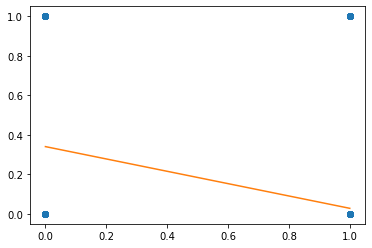

__________________
add_ons(x) vs churn(y)


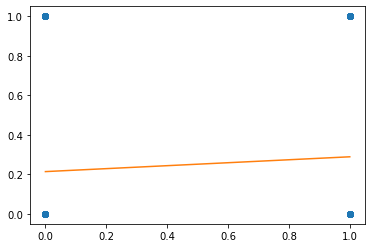

__________________
done


In [7]:
plot_variable_pairs(df)

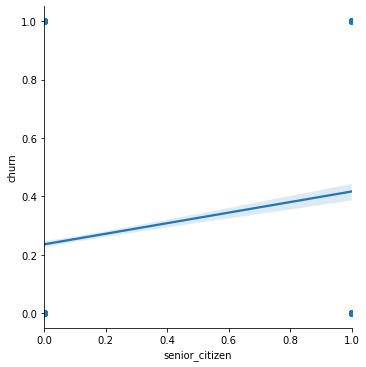

In [8]:
sns.lmplot(x="senior_citizen", y="churn", data=df)

In [9]:
def plot_variable_pairs2(df):
    for col in df.columns:
        sns.lmplot(x=col, y="churn", data=df)
    return print('done')

done


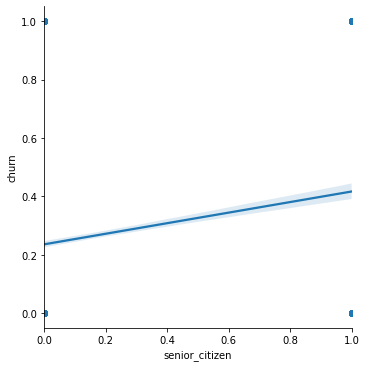

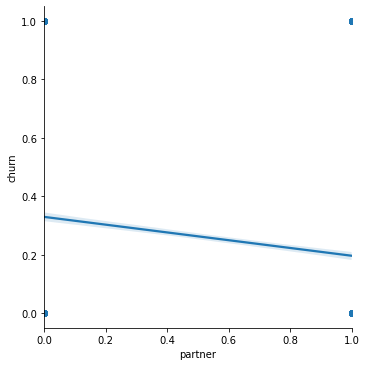

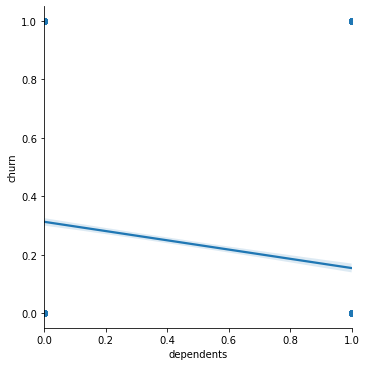

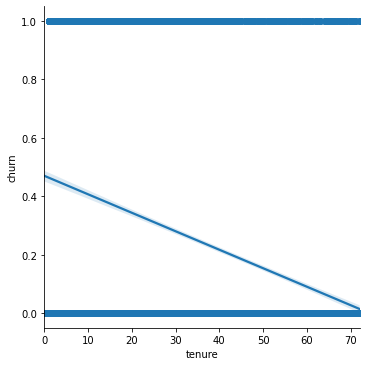

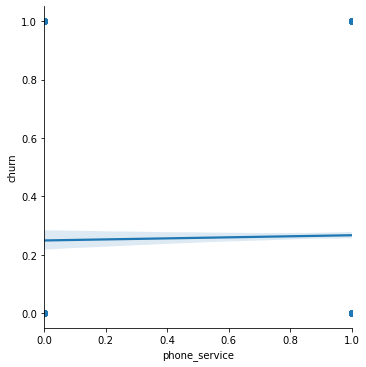

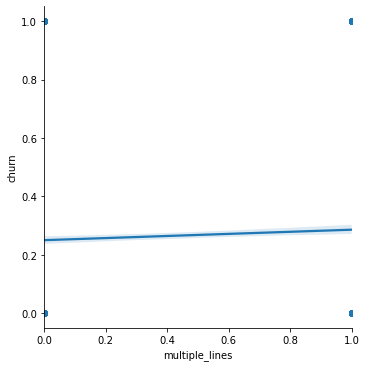

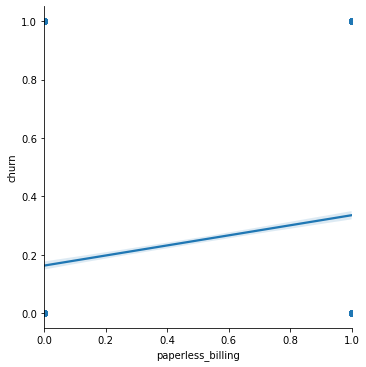

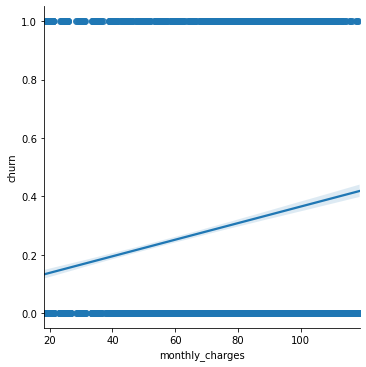

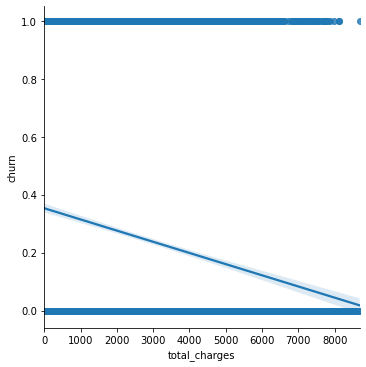

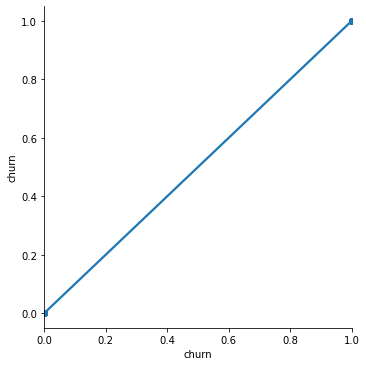

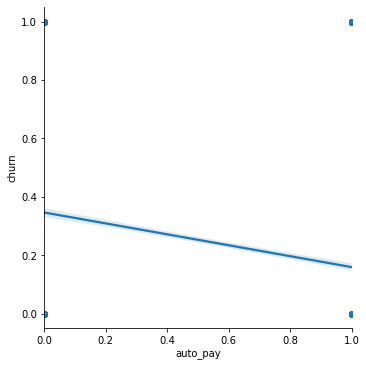

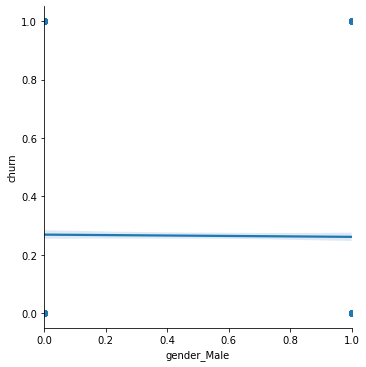

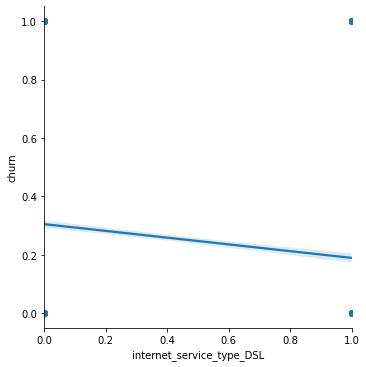

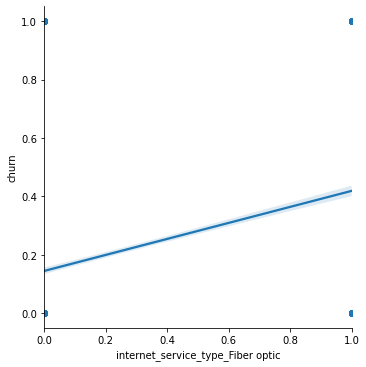

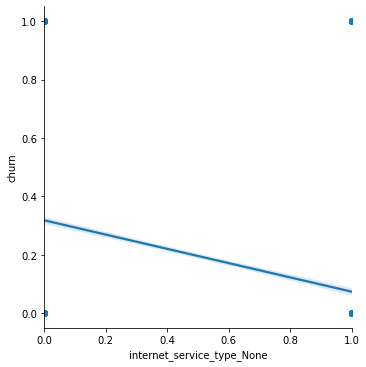

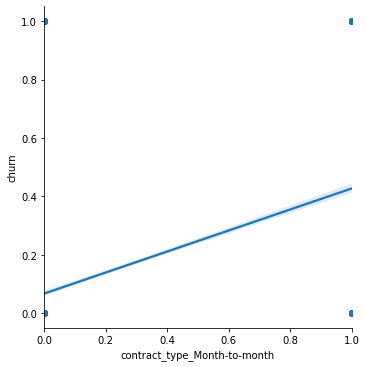

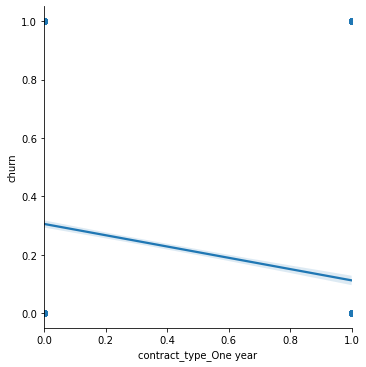

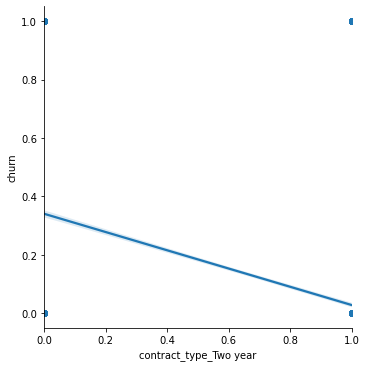

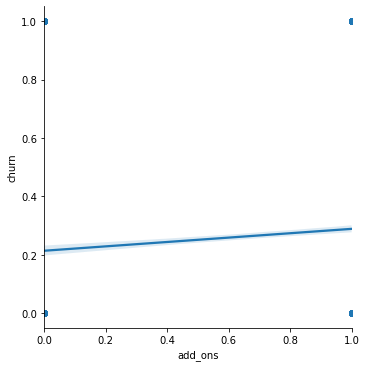

In [10]:
plot_variable_pairs2(df)

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [11]:
df['tenure_years'] = (df.tenure / 12).astype(int)
df.tenure_years

0       4
1       2
2       1
3       0
4       0
       ..
7038    2
7039    4
7040    5
7041    5
7042    4
Name: tenure_years, Length: 7043, dtype: int64

In [12]:
df.head()

senior_citizen  partner  dependents  tenure  phone_service  multiple_lines  \
0               0        1           0      53              0               0   
1               1        0           0      35              1               0   
2               0        1           1      21              0               0   
3               0        1           1       7              1               0   
4               0        0           0       3              1               0   

   paperless_billing  monthly_charges  total_charges  churn  auto_pay  \
0                  1            60.45        3184.25      1         0   
1                  1            73.00        2471.25      0         0   
2                  1            55.95        1157.05      1         0   
3                  0            69.45         477.05      0         0   
4                  1            69.95         220.45      0         0   

   gender_Male  internet_service_type_DSL  internet_service_type_Fiber optic  \
0            1                          1                                  0   
1            1                          1                                  0   
2            0                          1                                  0   
3            0                          1                                  0   
4            0                          1                                  0   

   internet_service_type_None  contract_type_Month-to-month  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   contract_type_One year  contract_type_Two year  add_ons  tenure_years  
0                       1                       0        1             4  
1                       1                       0        1             2  
2                       1                       0        1             1  
3                       1                       0        1             0  
4                       1                       0        1             0

In [13]:
def months_to_years(df):
    df['tenure_years'] = (df.tenure / 12).astype(int)
    return df

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [14]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [15]:
train, validate, test = train_validate_test_split(df, "churn", seed=123)
train.shape, validate.shape, test.shape

((3943, 20), (1691, 20), (1409, 20))

In [16]:
quant_vars = ['tenure', 'monthly_charges', 'total_charges']
cat_vars = ['senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'paperless_billing', 'auto_pay', 'gender_Male', 'internet_service_type_DSL', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'contract_type_Month-to-month', 'contract_type_One year', 'contract_type_Two year', 'add_ons']
target = 'churn'   

In [28]:
def plot_all_continuous_vars(train, target, quant_vars):
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)   
    plt.show()

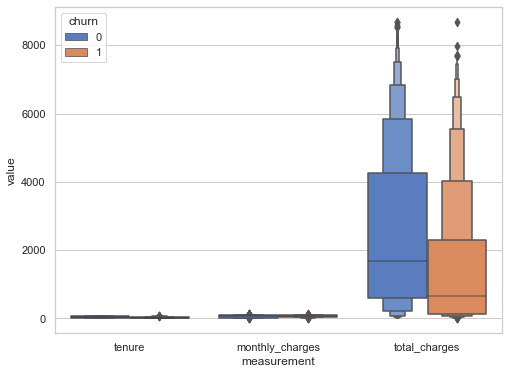

In [29]:
plot_all_continuous_vars(train, target, quant_vars)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='add_ons', ylabel='total_charges'>

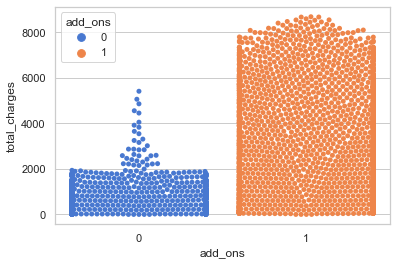

In [36]:
sns.barplot(x=var2, y=var1, hue=var2, data=train)

tenure quant(y) vs senior_citizen cat(x)


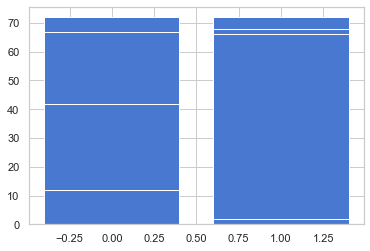

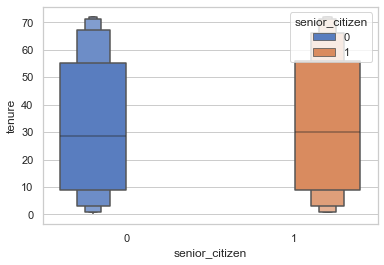

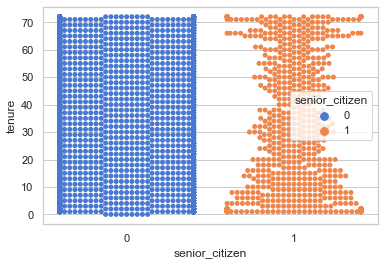

__________________
tenure quant(y) vs partner cat(x)


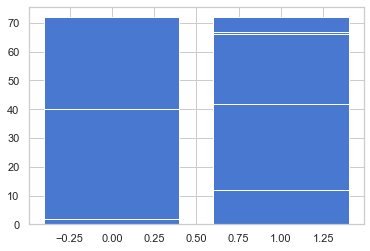

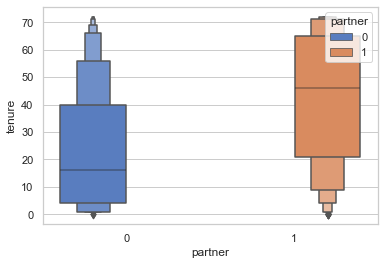

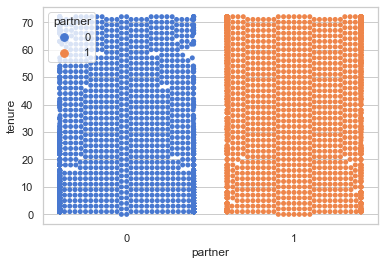

__________________
tenure quant(y) vs dependents cat(x)


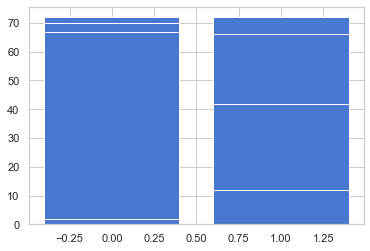

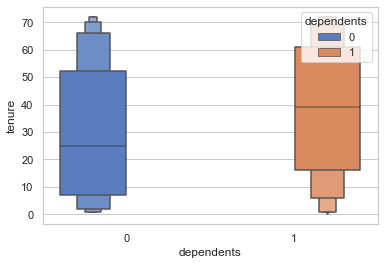

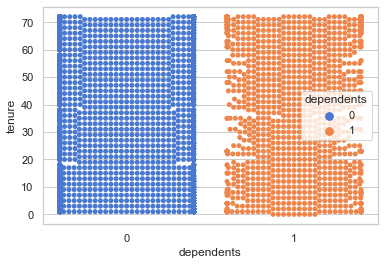

__________________
tenure quant(y) vs phone_service cat(x)


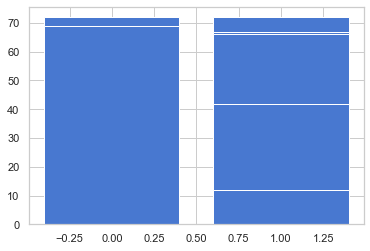

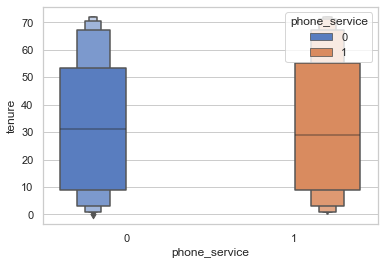

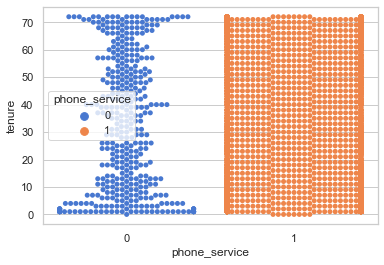

__________________
tenure quant(y) vs multiple_lines cat(x)


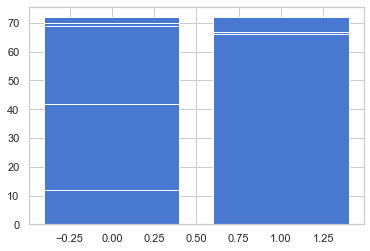

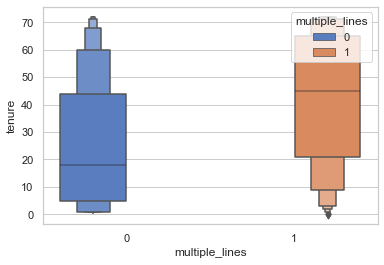

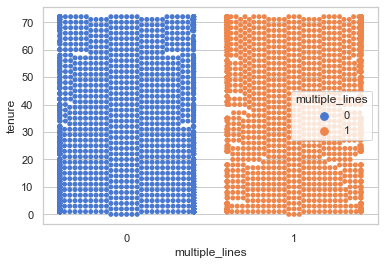

__________________
tenure quant(y) vs paperless_billing cat(x)


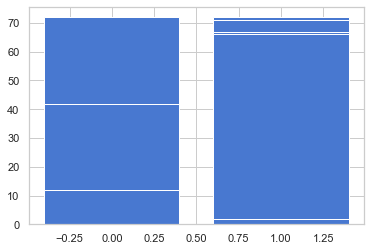

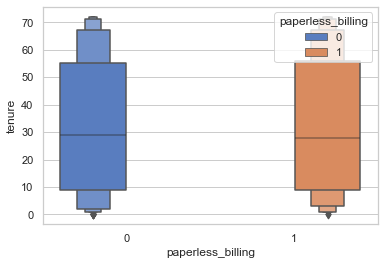

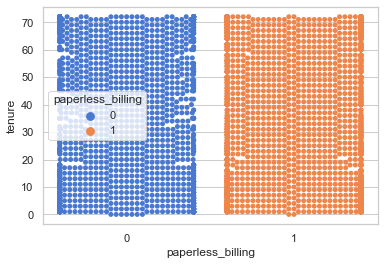

__________________
tenure quant(y) vs auto_pay cat(x)


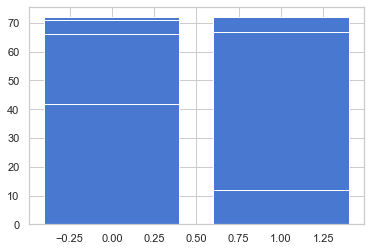

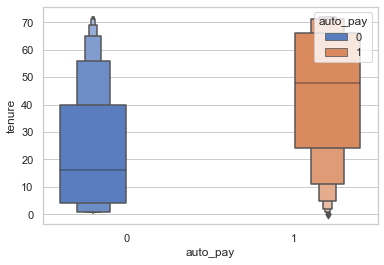

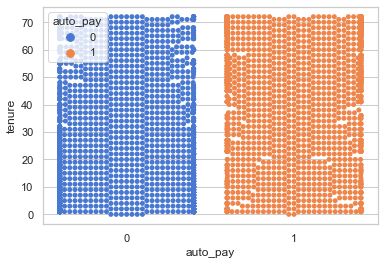

__________________
tenure quant(y) vs gender_Male cat(x)


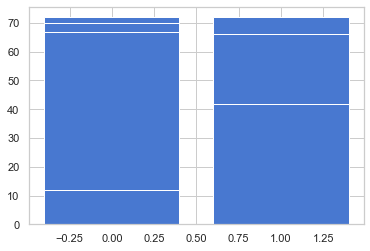

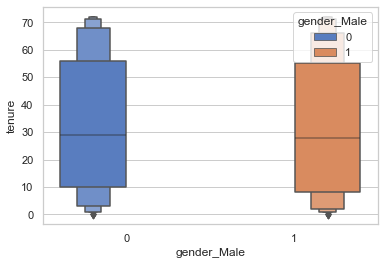

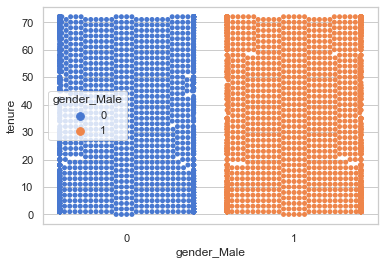

__________________
tenure quant(y) vs internet_service_type_DSL cat(x)


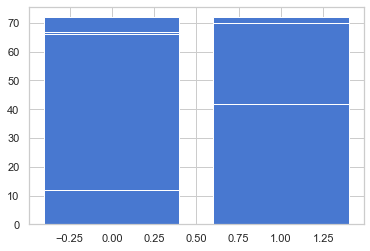

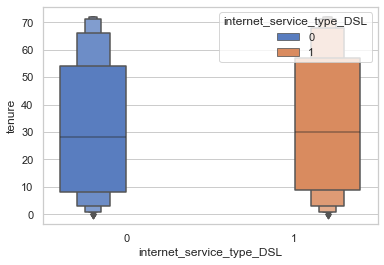

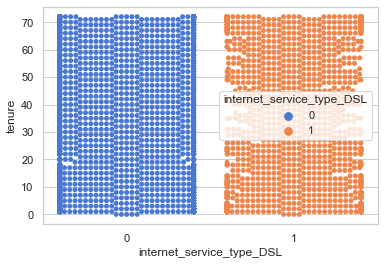

__________________
tenure quant(y) vs internet_service_type_Fiber optic cat(x)


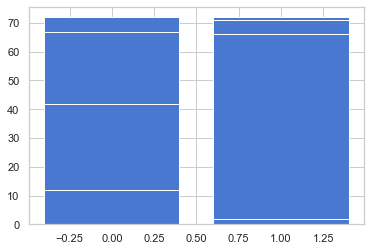

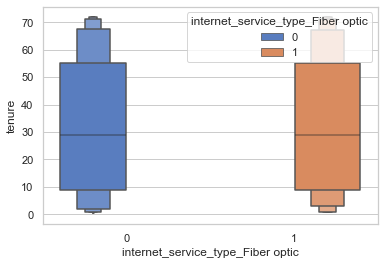

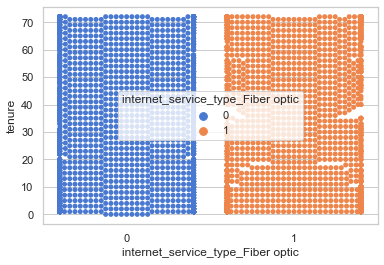

__________________
tenure quant(y) vs internet_service_type_None cat(x)


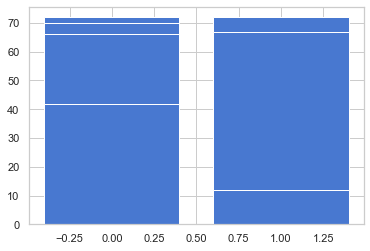

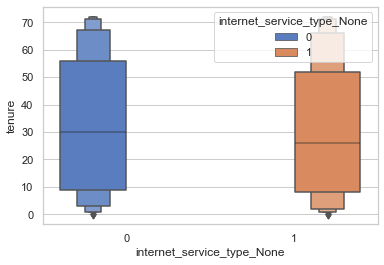

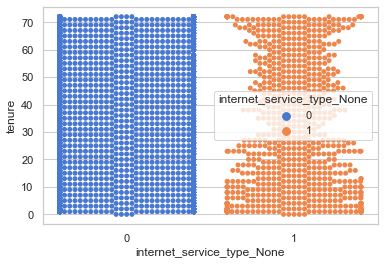

__________________
tenure quant(y) vs contract_type_Month-to-month cat(x)


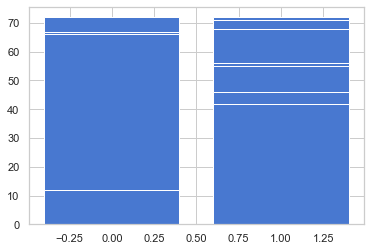

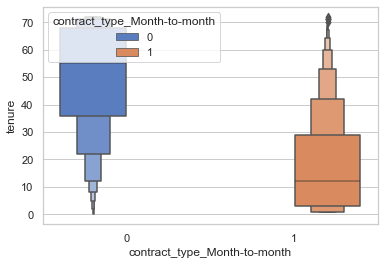

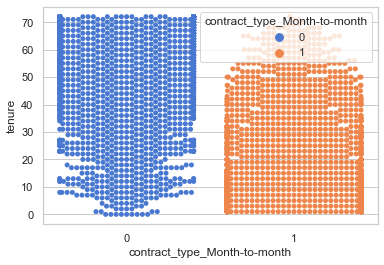

__________________
tenure quant(y) vs contract_type_One year cat(x)


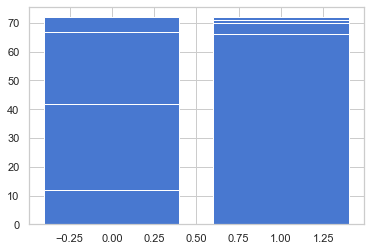

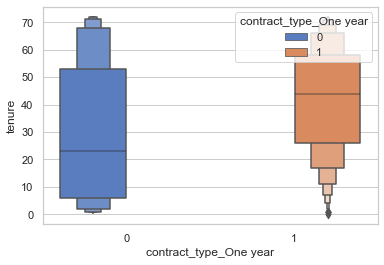

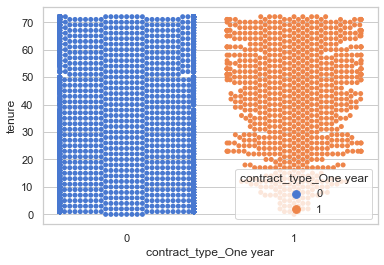

__________________
tenure quant(y) vs contract_type_Two year cat(x)


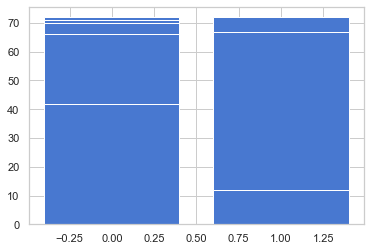

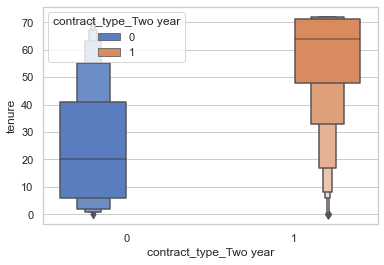

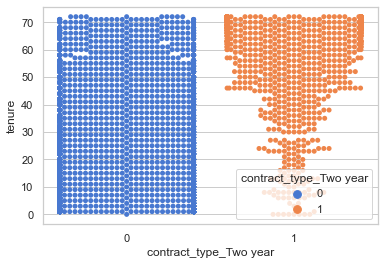

__________________
tenure quant(y) vs add_ons cat(x)


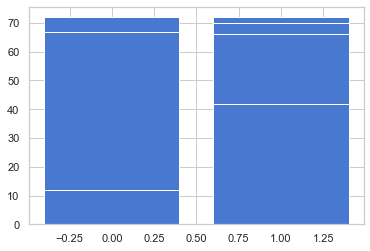

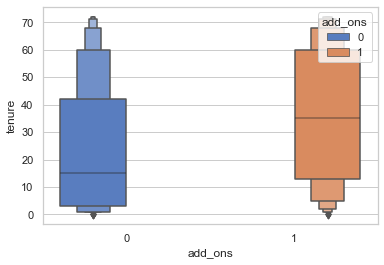

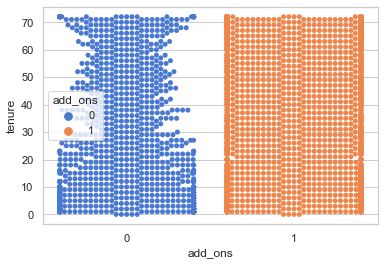

__________________
monthly_charges quant(y) vs senior_citizen cat(x)


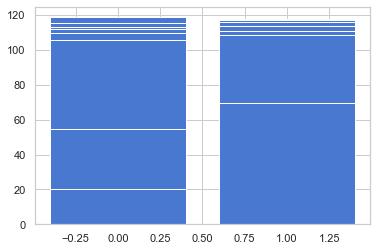

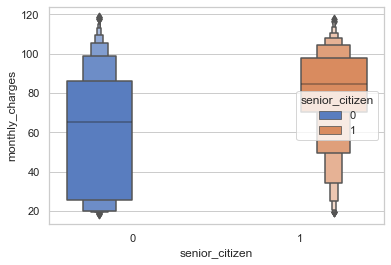

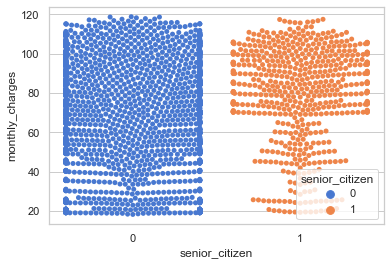

__________________
monthly_charges quant(y) vs partner cat(x)


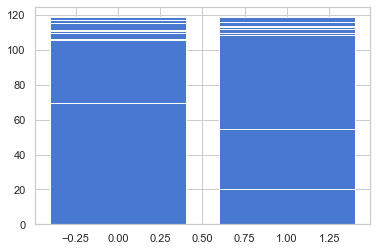

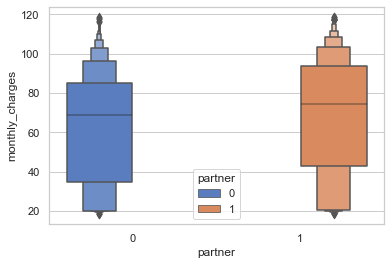

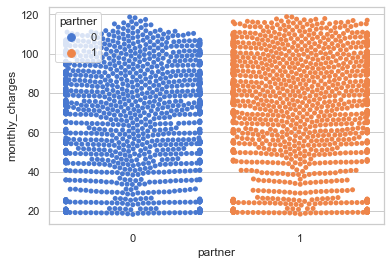

__________________
monthly_charges quant(y) vs dependents cat(x)


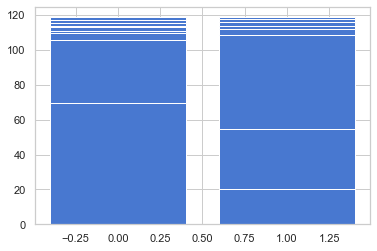

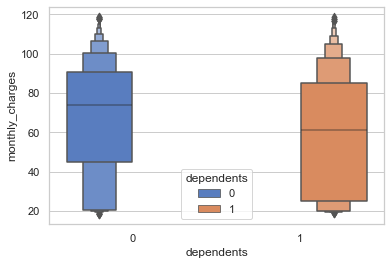

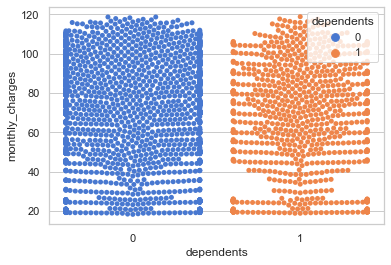

__________________
monthly_charges quant(y) vs phone_service cat(x)


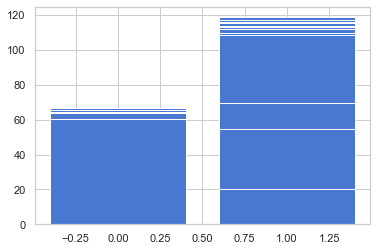

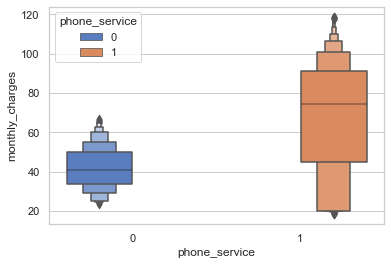

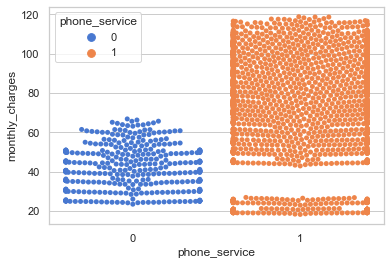

__________________
monthly_charges quant(y) vs multiple_lines cat(x)


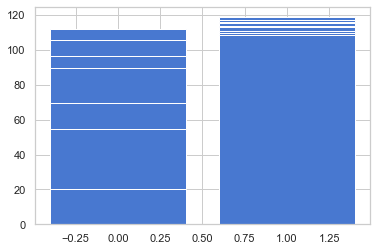

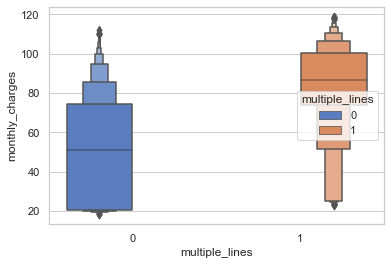

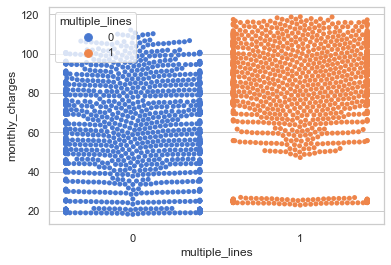

__________________
monthly_charges quant(y) vs paperless_billing cat(x)


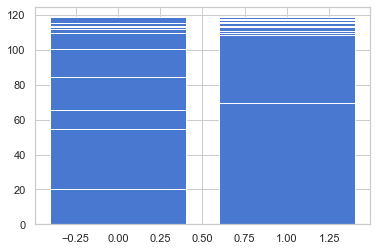

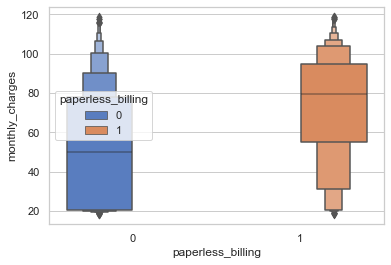

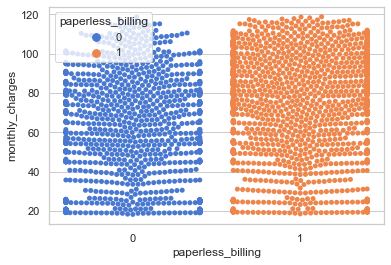

__________________
monthly_charges quant(y) vs auto_pay cat(x)


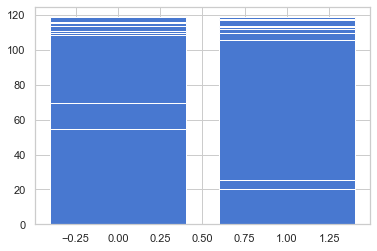

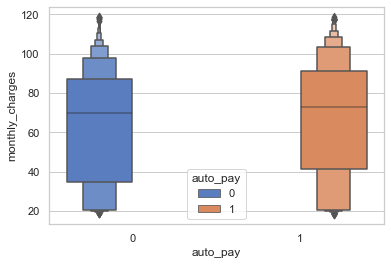

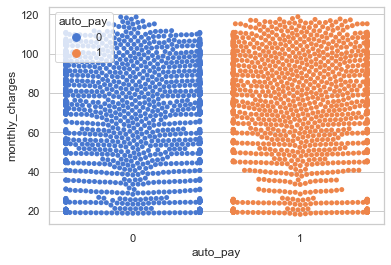

__________________
monthly_charges quant(y) vs gender_Male cat(x)


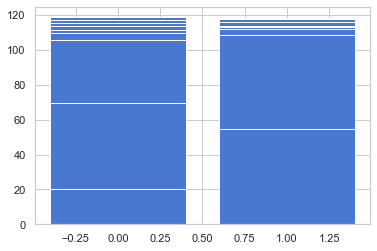

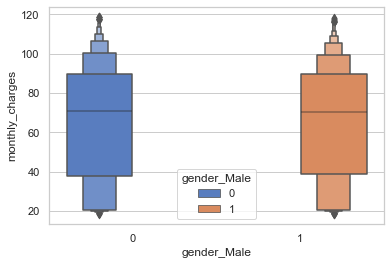

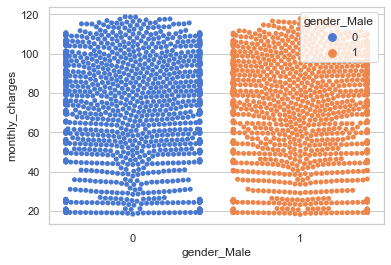

__________________
monthly_charges quant(y) vs internet_service_type_DSL cat(x)


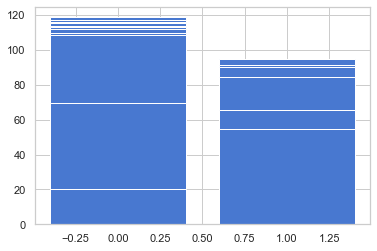

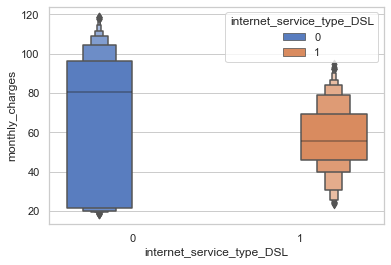

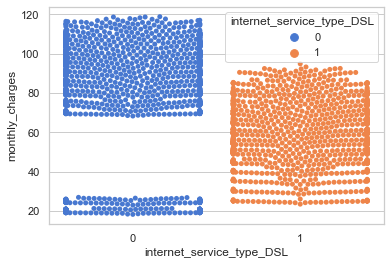

__________________
monthly_charges quant(y) vs internet_service_type_Fiber optic cat(x)


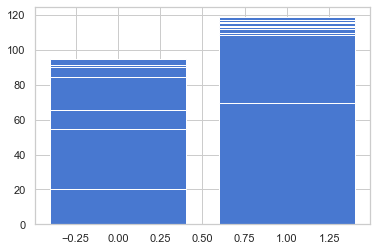

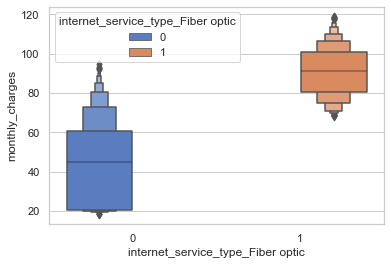

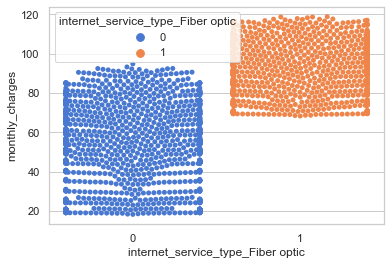

__________________
monthly_charges quant(y) vs internet_service_type_None cat(x)


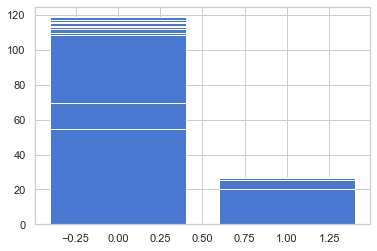

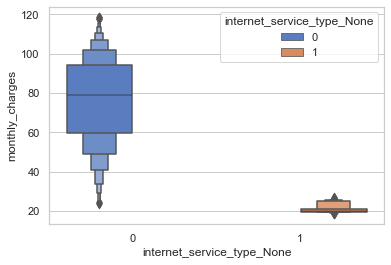

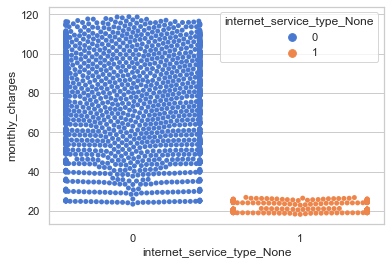

__________________
monthly_charges quant(y) vs contract_type_Month-to-month cat(x)


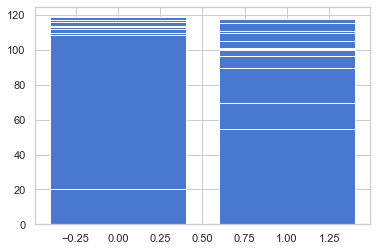

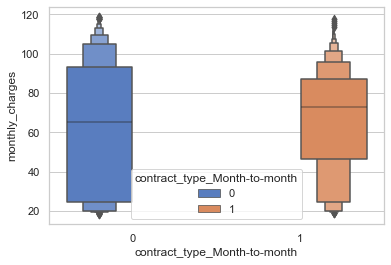

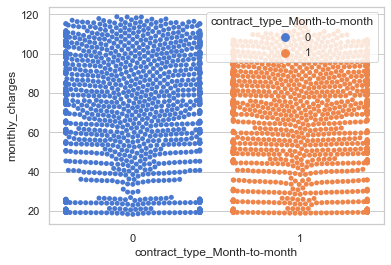

__________________
monthly_charges quant(y) vs contract_type_One year cat(x)


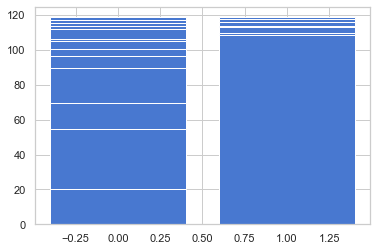

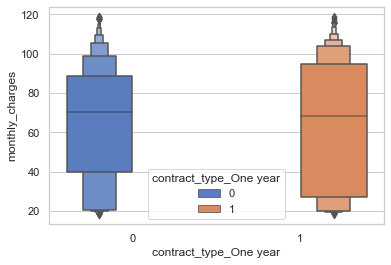

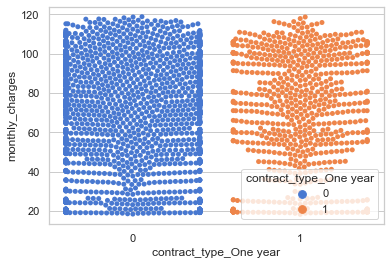

__________________
monthly_charges quant(y) vs contract_type_Two year cat(x)


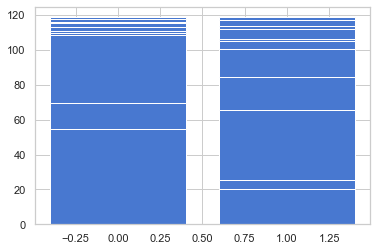

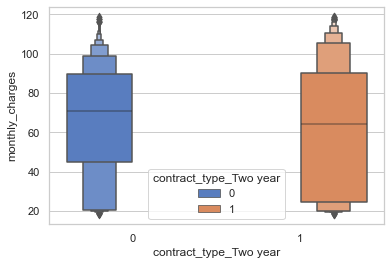

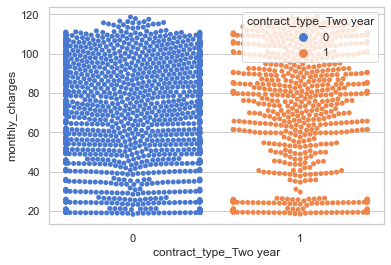

__________________
monthly_charges quant(y) vs add_ons cat(x)


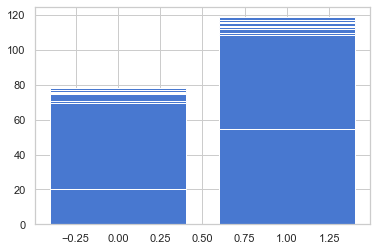

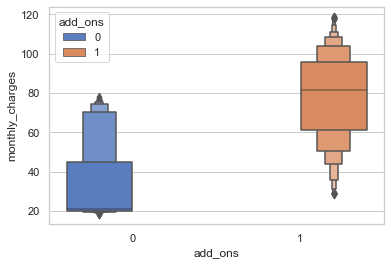

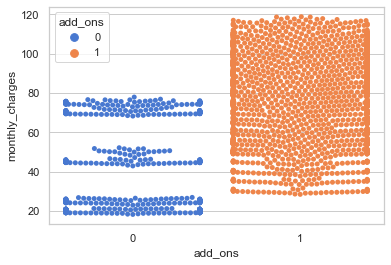

__________________
total_charges quant(y) vs senior_citizen cat(x)


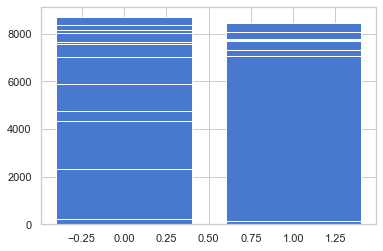

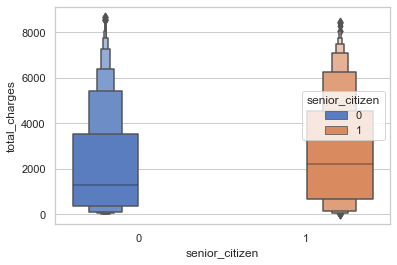

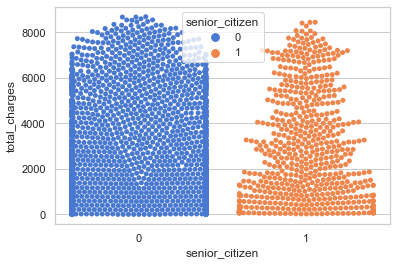

__________________
total_charges quant(y) vs partner cat(x)


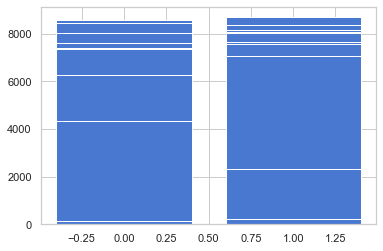

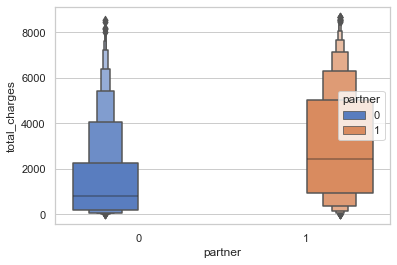

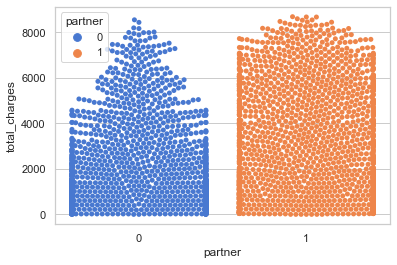

__________________
total_charges quant(y) vs dependents cat(x)


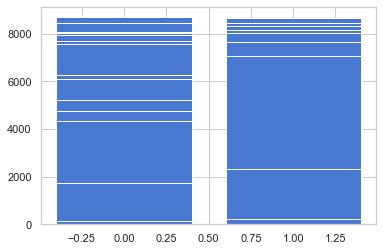

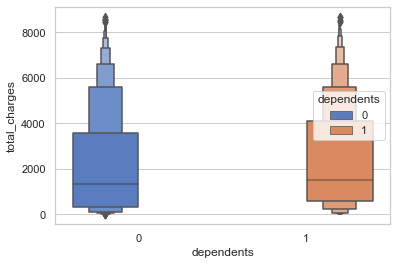

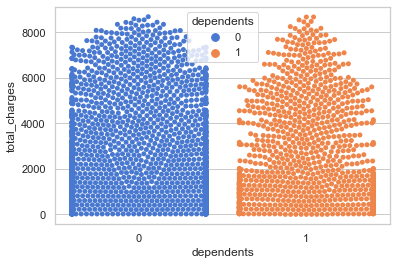

__________________
total_charges quant(y) vs phone_service cat(x)


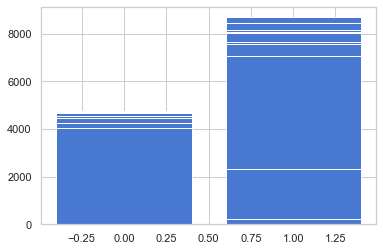

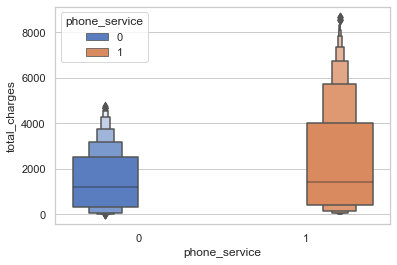

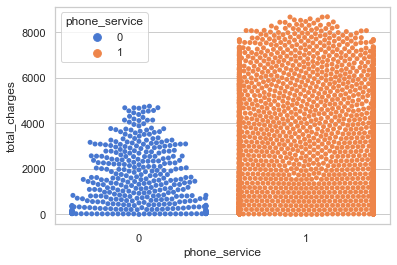

__________________
total_charges quant(y) vs multiple_lines cat(x)


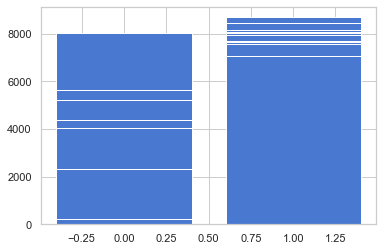

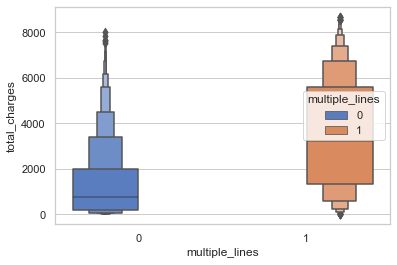

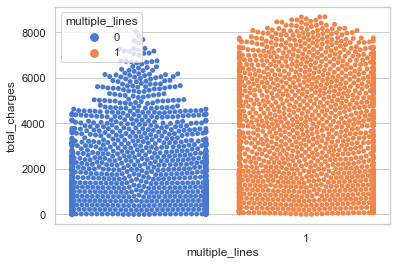

__________________
total_charges quant(y) vs paperless_billing cat(x)


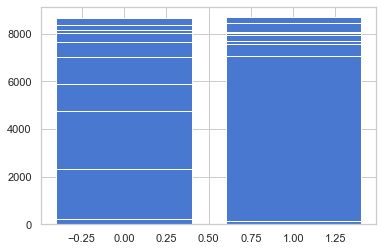

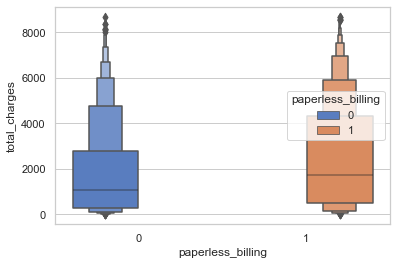

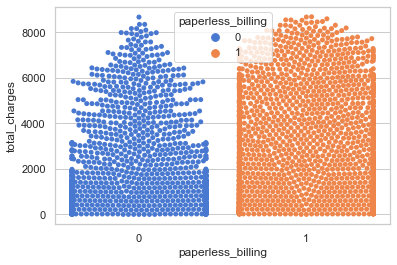

__________________
total_charges quant(y) vs auto_pay cat(x)


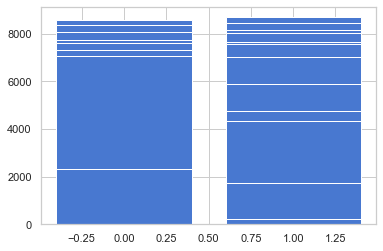

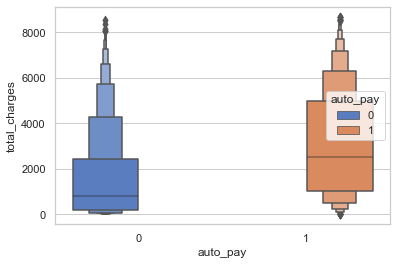

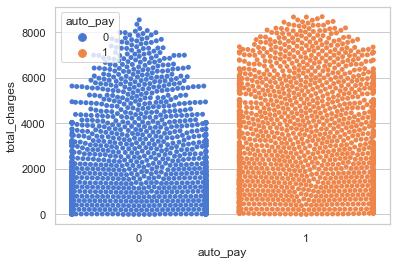

__________________
total_charges quant(y) vs gender_Male cat(x)


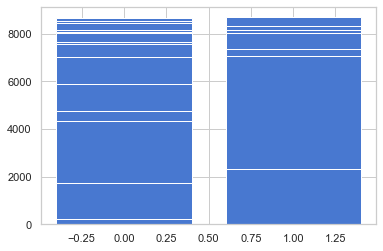

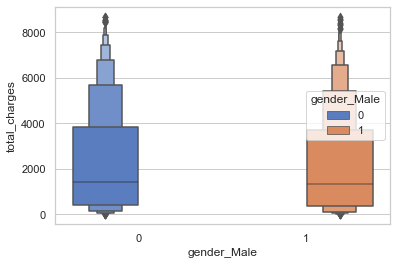

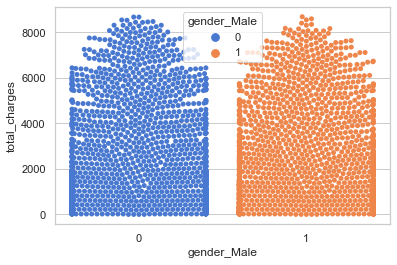

__________________
total_charges quant(y) vs internet_service_type_DSL cat(x)


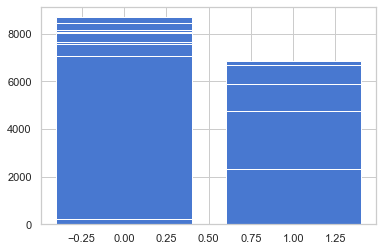

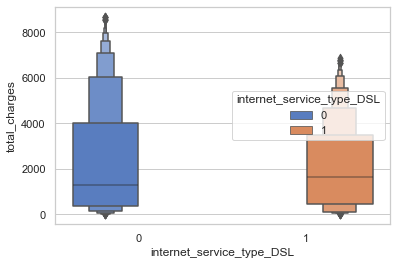

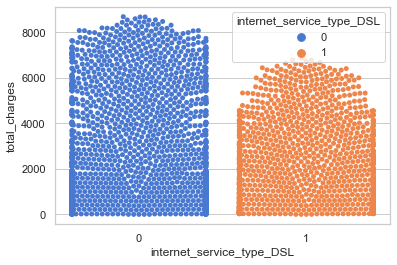

__________________
total_charges quant(y) vs internet_service_type_Fiber optic cat(x)


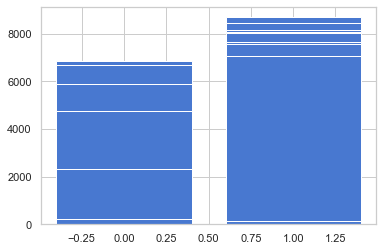

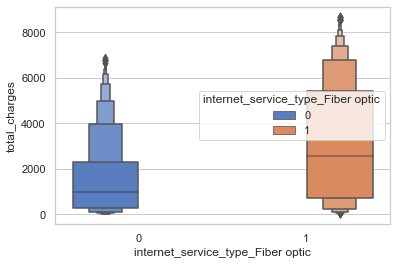

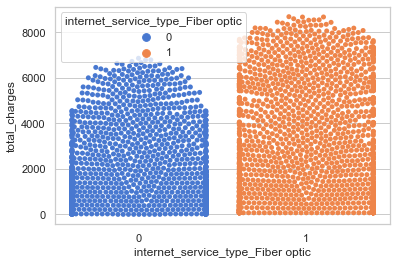

__________________
total_charges quant(y) vs internet_service_type_None cat(x)


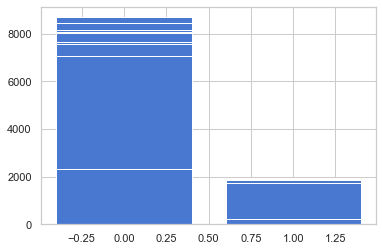

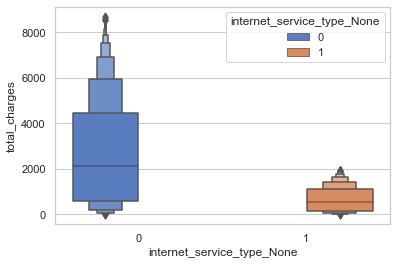

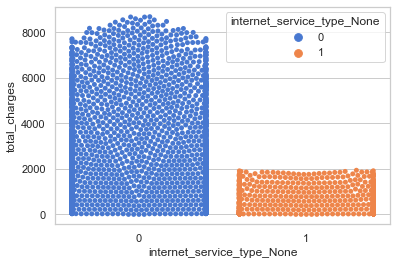

__________________
total_charges quant(y) vs contract_type_Month-to-month cat(x)


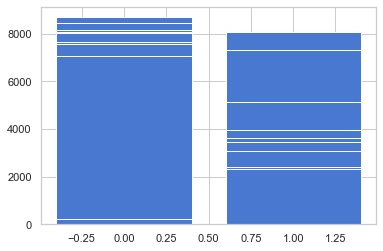

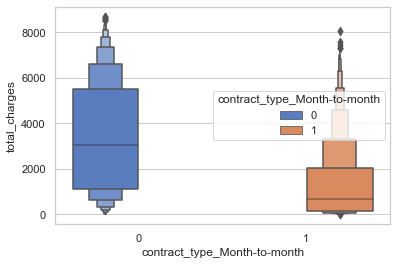

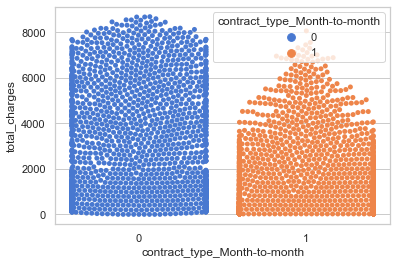

__________________
total_charges quant(y) vs contract_type_One year cat(x)


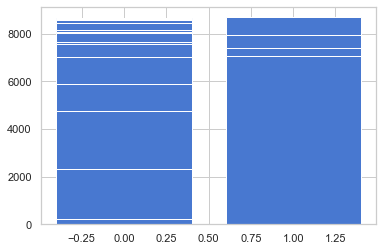

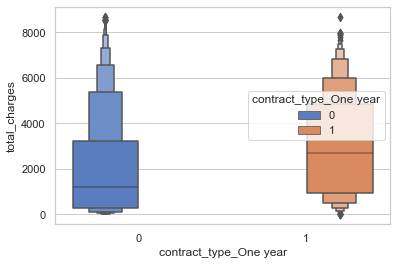

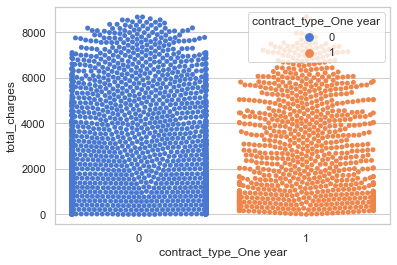

__________________
total_charges quant(y) vs contract_type_Two year cat(x)


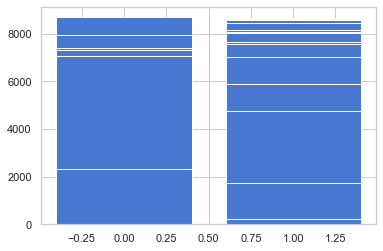

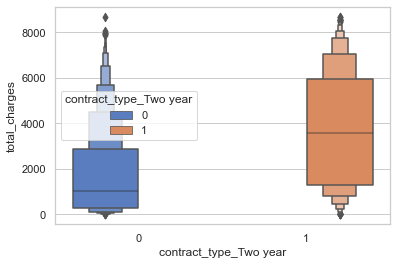

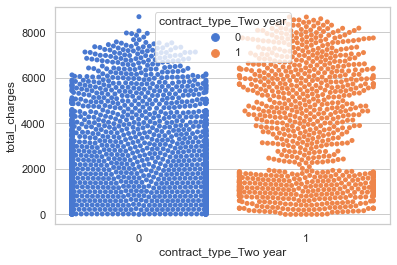

__________________
total_charges quant(y) vs add_ons cat(x)


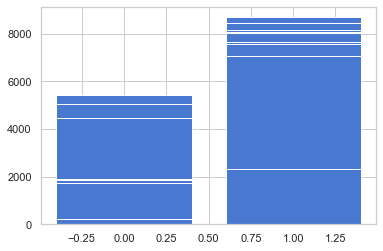

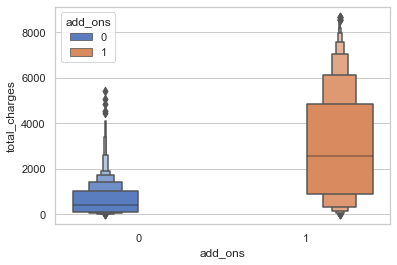

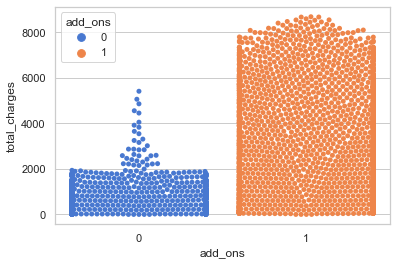

__________________


In [38]:
for var1 in quant_vars:
    for var2 in cat_vars:
        print(f'{var1} quant(y) vs {var2} cat(x)')
        plt.bar(train[var2], train[var1])
        plt.show()
        sns.boxenplot(x=var2, y=var1, hue=var2, data=train)
        plt.show()
        sns.swarmplot(x=var2, y=var1, hue=var2, data=train)
        plt.show()
        print('__________________')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'a'